In [1]:
import sqlite3
import json
#con = sqlite3.connect("../data/users")
#con2 = sqlite3.connect('../data/reformedUserData')
#cur = con.cursor()
#cur2 = con2.cursor()
#res = cur.execute("SELECT COUNT(*) FROM accounts")
#print(res.fetchone())


#res2 = cur.execute("SELECT games FROM accounts WHERE games_used = 1 Limit 1")
#grabbing a single account from the return
#struct Account {
#    steam_id: u64,// steamID
#    games_used: bool,
#    friends_available: bool,
#    friends: Vec<String>,
#    games: Vec<Game>,
#}
#firstAccount= res2.fetchall()[0]

#provides a list of games
#[{'appid': 10, 'playtime_2weeks': 0, 'playtime_forever': 102377, 'is_recommended': 0}]
#gameList = json.loads(firstAccount[0])

#grabs the first game
#print(gameList[0]["playtime_forever"])

In [10]:
import sqlite3
con2 = sqlite3.connect('../data/reformedUserData')
cur2 = con2.cursor()
accounts = cur2.execute("SELECT playtime_2weeks,playtime_forever FROM gameInteractions")
gameInteractions = accounts.fetchall()
#averages
counter=0
playtime2WeekSum=0
playtimeForever=0
for gameTime in gameInteractions:
    counter+=1
    playtime2WeekSum += gameInteractions[0][0]
    playtimeForever += gameInteractions[0][1]
average2Week = playtime2WeekSum/counter
averageForever = playtimeForever/counter
print("playtime")
print("2 week Average:",average2Week)
print("forever Average:",averageForever)
#medians
playtime2WeekList= []
playtimeForeverList= []
for gameTime in gameInteractions:
    playtime2WeekList.append(gameInteractions[0][0])
    playtimeForeverList.append(gameInteractions[0][1])
playtime2WeekList.sort()
playtimeForeverList.sort()
print("2week median:",playtime2WeekList[round(len(playtime2WeekList)/2)])
print("forever median:",playtimeForeverList[round(len(playtimeForeverList)/2)])




playtime
2 week Average: 0.0
forever Average: 102377.0
2week median: 0
forever median: 102377


In [2]:
import sqlite3
import json
con2 = sqlite3.connect('../data/reformedUserData')
cur2 = con2.cursor()
gameInteractions = cur2.execute("SELECT app_id, playtime_forever FROM gameInteractions")
gameCountsWithNames = {}
for gameInteraction in gameInteractions:
        currentGameName = gameInteraction[0]
        playtimeEver = gameInteraction[1]
        if playtimeEver > 0 and currentGameName in gameCountsWithNames:
                gameCountsWithNames[currentGameName] +=1      
        else:
            gameCountsWithNames[currentGameName] = 1
gameCounts = list(gameCountsWithNames.values())
over5 = 0
over10 = 0
over20 = 0
over50 = 0
over100 = 0
over500 = 0
over1000 = 0
for count in gameCounts:
     if count > 5:
          over5 +=1
     if count > 10:
          over10 +=1
     if count > 20:
          over20 +=1
     if count > 50:
          over50 +=1
     if count > 100:
          over100 +=1
     if count > 500:
          over500 +=1
     if count > 1000:
          over1000 +=1
print("5",over5)
print("10",over10)
print("20",over20)
print("50",over50)
print("100",over100)
print("500",over500)
print("1000",over1000)



5 9800
10 9800
20 9800
50 9800
100 9800
500 9800
1000 9799


43359


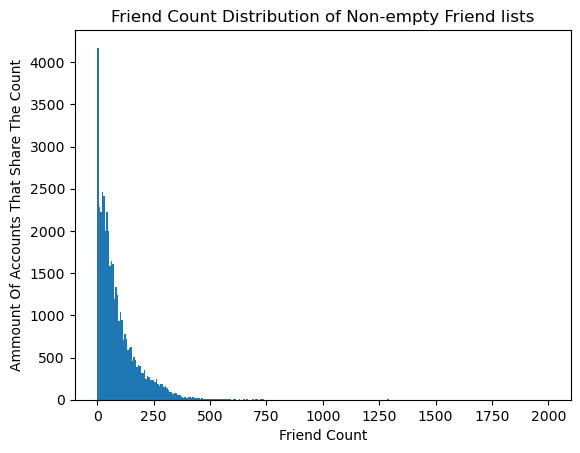

In [3]:
#creating a histogram of freind counts if not empty
import sqlite3
import matplotlib.pyplot as plt
con = sqlite3.connect("../data/users")
cur = con.cursor()
reccomendations = cur.execute("SELECT friends FROM accounts where friends is NOT null AND friends != ''")
#creating a tuple list ("gameID", countInt)
freindCounts = []
freindAccountCounter = 0
for account in reccomendations:
    freindAccountCounter +=1
    friendList = json.loads(account[0])
    freindCounts.append(len(friendList))
print(freindAccountCounter)
plt.hist(freindCounts,300,None,False,None,False,None,'bar','mid','vertical',None,False)
plt.xlabel("Friend Count")
plt.ylabel("Ammount Of Accounts That Share The Count")
plt.title('Friend Count Distribution of Non-empty Friend lists')
plt.show()

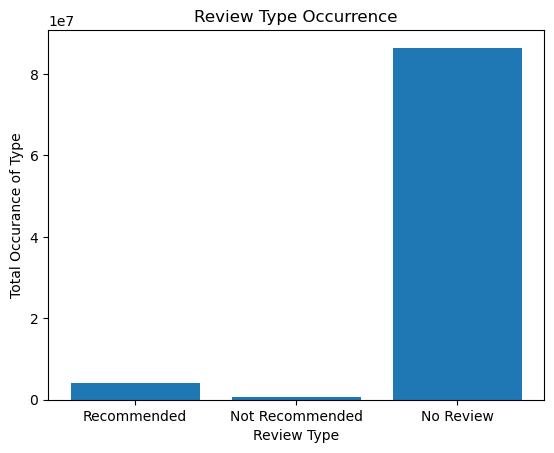

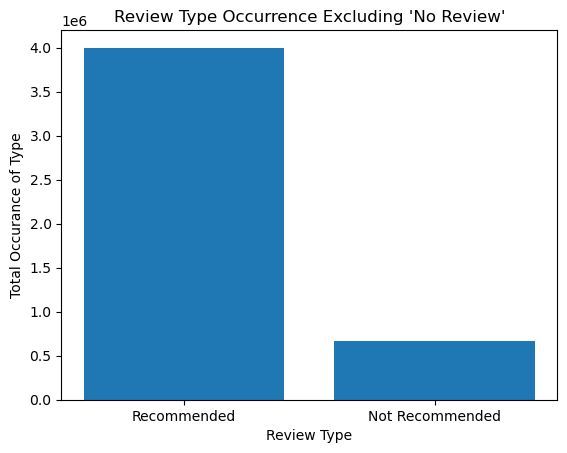

In [4]:
#creating bar chart of recommendation vs anti-recommendation
import sqlite3
import matplotlib.pyplot as plt
#gameInteractions( row_id TEXT PRIMARY KEY, steam_id TEXT, app_id TEXT, playtime_2weeks INTEGER, playtime_forever INTEGER, is_recommended INTEGER)
con2 = sqlite3.connect('../data/reformedUserData')
cur2 = con2.cursor()
accounts = cur2.execute("SELECT is_recommended FROM gameInteractions")
recCount = 0
antiRecCount = 0
noReview =0
for account in accounts:
        rec = account[0]
        if(rec == 1):
            recCount +=1
        elif(rec == 0):
            noReview +=1
        else:
            antiRecCount +=1
data = {'Recommended':recCount,'Not Recommended':antiRecCount, 'No Review':noReview}
names = list(data.keys())
vals = list(data.values())
plt.bar(names,vals)
plt.xlabel("Review Type")
plt.ylabel("Total Occurance of Type")
plt.title('Review Type Occurrence')
plt.show()
data2 = {'Recommended':recCount,'Not Recommended':antiRecCount}
names2 = list(data2.keys())
vals2 = list(data2.values())
plt.bar(names2,vals2)
plt.xlabel("Review Type")
plt.ylabel("Total Occurance of Type")
plt.title('Review Type Occurrence Excluding \'No Review\'')
plt.show()


under 2: 0
over 500: 20292
Steam Account Count: 615175
Games Owned Count: 91147451
games per account average: 148.1650766042183


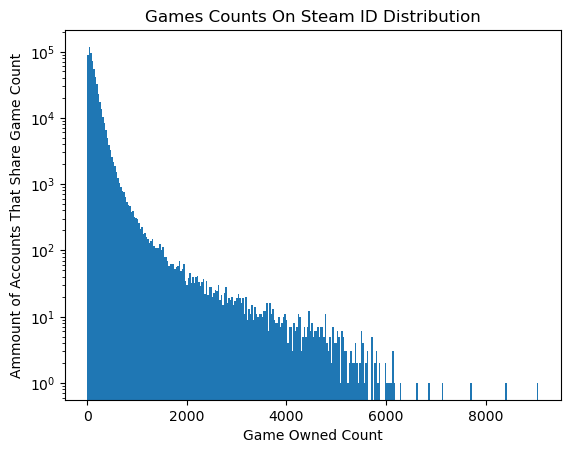

In [2]:
#creating the histogram of account game counts
import sqlite3
import matplotlib.pyplot as plt
#gameInteractions( row_id TEXT PRIMARY KEY, steam_id TEXT, app_id TEXT, playtime_2weeks INTEGER, playtime_forever INTEGER, is_recommended INTEGER)
con2 = sqlite3.connect('../data/reformedUserData')
cur2 = con2.cursor()
accounts = cur2.execute("SELECT steam_id FROM gameInteractions")

#creating a tuple list ("gameID", countInt)
steamWithGameCounts = {}
gameCount =0
for account in accounts:
    gameCount+=1
    steamID = account[0]
    if steamID in steamWithGameCounts:
        steamWithGameCounts[steamID] +=1             
    else:
        steamWithGameCounts[steamID] = 1
accountsWithLessThan2Games =0
accountsWithMoreThan500Games =0
for value in steamWithGameCounts.values():
    if value <2:
        accountsWithLessThan2Games+=1
    if value >500:
        accountsWithMoreThan500Games +=1

print("under 2:",accountsWithLessThan2Games)
print("over 500:",accountsWithMoreThan500Games)

steamAccountCount = len(list(steamWithGameCounts.values()))
print("Steam Account Count:",steamAccountCount)
print("Games Owned Count:",gameCount)
gameAverage = gameCount / steamAccountCount
print("games per account average:",gameAverage)
gameCounts = [*steamWithGameCounts.values()]
plt.hist(gameCounts,300,None,False,None,False,None,'bar','mid','vertical',None,True)
plt.xlabel("Game Owned Count")
plt.ylabel("Ammount of Accounts That Share Game Count")
plt.title('Games Counts On Steam ID Distribution')
plt.show()

key: ('730',) value: 564058


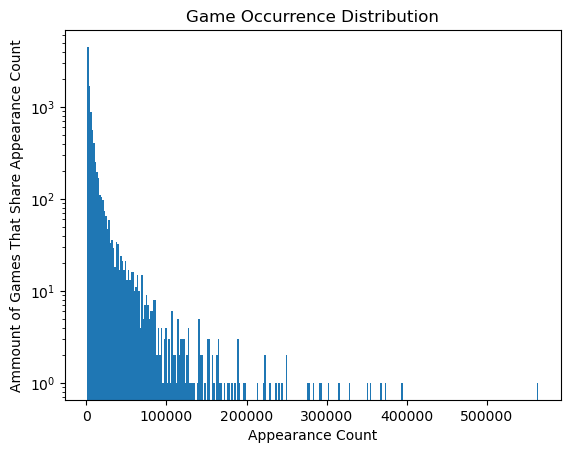

In [6]:
#creating the histogram of game appearances
import sqlite3
import matplotlib.pyplot as plt
#gameInteractions( row_id TEXT PRIMARY KEY, steam_id TEXT, app_id TEXT, playtime_2weeks INTEGER, playtime_forever INTEGER, is_recommended INTEGER)
con2 = sqlite3.connect('../data/reformedUserData')
cur2 = con2.cursor()
gameIDs = cur2.execute("SELECT app_id FROM gameInteractions")

#creating a tuple list ("gameID", countInt)
gameCountsWithNames = {}
for gameID in gameIDs:
    if gameID in gameCountsWithNames:
            gameCountsWithNames[gameID] +=1             
    else:
        gameCountsWithNames[gameID] = 1
for key,value in gameCountsWithNames.items():
     if value > 500_000:
          print("key: "+str(key)+" value: "+ str(value))
gameCounts = [*gameCountsWithNames.values()]
plt.hist(gameCounts,300,None,False,None,False,None,'bar','mid','vertical',None,True)
plt.xlabel("Appearance Count")
plt.ylabel("Ammount of Games That Share Appearance Count")
plt.title('Game Occurrence Distribution')
plt.show()

           


